In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# Loading and Exploring data

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data = customer_data.rename(columns={
    'CustomerID': 'ID',
    'Age': 'Age',
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})


In [7]:
customer_data.head()

,ID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
def categorize(score):
    if score >= 70:
        return 'High'
    elif score >= 40:
        return 'Medium'
    else:
        return 'Low'

customer_data['SpendingScore'] = customer_data['SpendingScore'].apply(categorize)

In [9]:
customer_data.head()

,ID,Genre,Age,Income,SpendingScore
0,1,Male,19,15,Low
1,2,Male,21,15,High
2,3,Female,20,16,Low
3,4,Female,23,16,High
4,5,Female,31,17,Medium


In [10]:
customer_data = customer_data.rename(columns={'SpendingScore':'Spending Category'})


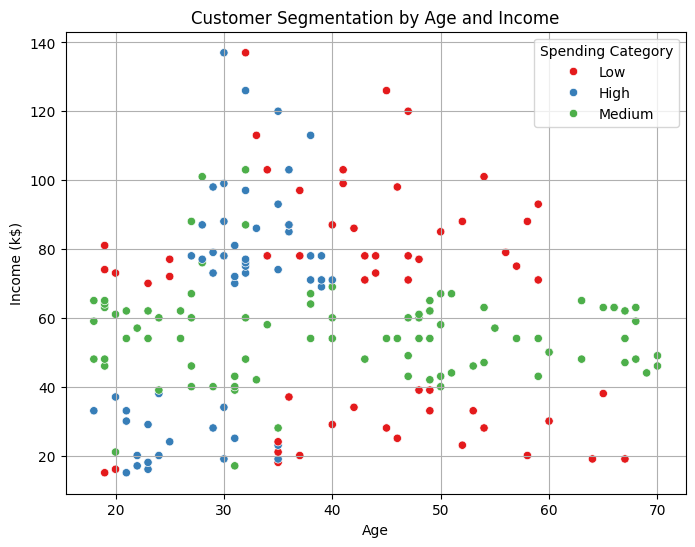

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=customer_data, x='Age', y='Income', hue='Spending Category', palette='Set1')
plt.title('Customer Segmentation by Age and Income')
plt.xlabel('Age')
plt.ylabel('Income (k$)')
plt.legend(title='Spending Category')
plt.grid(True)
plt.show()

<b> Due to the distinct clusters and non-linear nature of the data, this dataset seems like a good candidate for the KNN model </b>

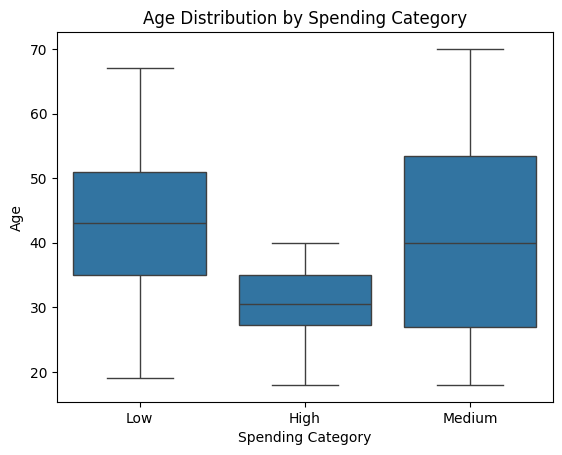

In [12]:
sns.boxplot(data=customer_data, x='Spending Category', y='Age')
plt.title('Age Distribution by Spending Category')
plt.show()

1. Low spenders seem to be concentrated on the top half of the age bracket, ranging from 35 to 50 (middle-aged)
2. High spenders seem to be concentrated in the lower half of the age bracket, ranging from 25 to 35 (younger customer)
3. medium spenders seem to be broader, ranging from 30 to 50 

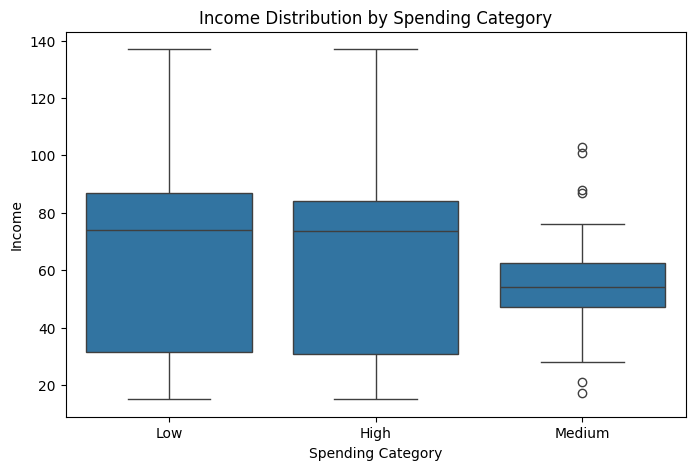

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=customer_data, x='Spending Category', y='Income')
plt.title('Income Distribution by Spending Category')
plt.show()


There seems to be outliers in middle-segmented customers, where income is 80k and below 30k. I am gonna remove it.

In [14]:
customer_data_ = customer_data[~((customer_data['Spending Category'] == 'Medium') & 
                   ((customer_data['Income'] > 80) | (customer_data['Income'] < 40)))]
customer_data = customer_data_

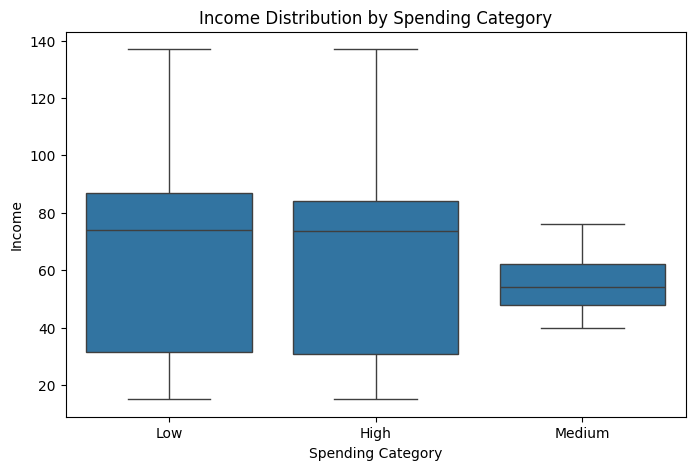

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=customer_data, x='Spending Category', y='Income')
plt.title('Income Distribution by Spending Category')
plt.show()


<b> outliers are succesfully removed </b>

In [16]:
customer_data.isnull().any()


ID                   False
Genre                False
Age                  False
Income               False
Spending Category    False
dtype: bool

# Prepare Data

In [17]:
x = customer_data[['Age','Income']]
x

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
5,22,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [18]:
y = customer_data[['Spending Category']]
y


,Spending Category
0,Low
1,High
2,Low
3,High
5,High
...,...
195,High
196,Low
197,High
198,Low


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((152, 2), (39, 2), (152, 1), (39, 1))

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [22]:
print("Mean (train):", x_train.mean(axis=0))  # Should be ~0
print("Std (train):", x_train.std(axis=0))    # Should be ~1
print("Mean (test):", x_test.mean(axis=0))    # Likely not 0 (scaler was fit on train only)

Mean (train): [1.92828210e-16 3.50596745e-17]
Std (train): [1. 1.]
Mean (test): [ 0.01717902 -0.02774639]


# Training Model (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

In [24]:
neigh.fit(x_train,y_train.values.ravel())

KNeighborsClassifier()

In [25]:
neigh.score(x_test,y_test)

0.7948717948717948

In [26]:
neigh.score(x_train,y_train)

0.8618421052631579

<b> It is not overfitted and is properly generalised, let's try to do hyperparameter tuning to further tune out the model </b>

# Tuning 

In [27]:
from sklearn.model_selection import GridSearchCV


In [28]:
grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 25],  # Test extreme values
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3],  # Test Manhattan (p=1), Euclidean (p=2), and higher norms
    'metric': ['euclidean', 'manhattan', 'cosine', 'minkowski']  # Other metrics
}
neigh = KNeighborsClassifier()

In [29]:
gcv = GridSearchCV(neigh,grid,cv=5,scoring='accuracy')
gcv.fit(x_train, y_train.values.ravel())


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine',
                                    'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 25],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [30]:
print("Best parameters:", gcv.best_params_)
print("Best cross-validation score:", gcv.best_score_)

best_knn = gcv.best_estimator_

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best cross-validation score: 0.8163440860215054


In [31]:
print("Test score:", best_knn.score(x_test, y_test))


Test score: 0.7948717948717948


In [32]:
best_params = gcv.best_params_
model_ =KNeighborsClassifier(**best_params)

In [33]:
model_.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(metric='euclidean', p=1)

In [34]:
model_.score(x_train,y_train)

0.8618421052631579

In [35]:
model_.score(x_test,y_test)

0.7948717948717948

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model_.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  2  0]
 [ 6  6  0]
 [ 0  0 16]]
Classification Report:
               precision    recall  f1-score   support

        High       0.60      0.82      0.69        11
         Low       0.75      0.50      0.60        12
      Medium       1.00      1.00      1.00        16

    accuracy                           0.79        39
   macro avg       0.78      0.77      0.76        39
weighted avg       0.81      0.79      0.79        39



In [37]:
import joblib
joblib.dump(model_, 'customer_segmentation.pkl')  
loaded_model = joblib.load('customer_segmentation.pkl') 

In [38]:
print(y_train.value_counts())

Spending Category
Medium               62
Low                  47
High                 43
Name: count, dtype: int64


In [39]:
joblib.dump(scaler, "scaler.pkl")  

['scaler.pkl']

In [69]:
xgb_model.score(x_train, y_train_encoded)

0.9473684210526315

In [73]:
y_test_encoded = le.transform(y_test).flatten()
xgb_model.score(x_test,y_test_encoded)

C:\Users\JONNA RISHIKA ANANYA\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.8717948717948718